In [25]:
import numpy as np
from Coeff_approx import coefficientSail as coeff
from sympy import symbols, diff, simplify, lambdify, solve, nsolve, cos, sin, sqrt
from scipy.optimize import root_scalar, fsolve, curve_fit
# import Sailor as s
from matplotlib import pyplot as plt

def optimzeAngleOfAttack(appWindAngle):
    '''appWindAngle - pi/2 = angle(dc/dalpha,appWindVec) <=> ... '''
    alpha = symbols('alpha',real=True)
    cL,cD = coeff(alpha)
    tangVec = diff(cL,alpha),diff(cD,alpha) # (cL'(alpha),cD'(alpha))
    expr = tangVec[1]/sqrt(tangVec[0]**2+tangVec[1]**2)+np.sin(appWindAngle)
    # expr = 1 + (tangVec[1]/tangVec[0])**2 - np.sin(appWindAngle)**2
    # expr = tangVec[1]/tangVec[0] - np.sqrt(1/(np.cos(appWindAngle))**2 - 1)
    simpl = simplify(expr)
    # simplprime = diff(simpl, alpha)
    # simplprime2 = diff(simplprime, alpha)
    # lam_f = lambdify(alpha, simpl)
    # fprime = lambdify(alpha, simplprime)
    # fprime2 = lambdify(alpha, simplprime2)
    # sol = root_scalar(lam_f,x0=0.1,fprime=fprime,method='newton')
    # return sol.root
    return solve((simpl),(alpha))

appWindAngle = np.linspace(10*np.pi/180,179*np.pi/180,20)
# alphaOpt = optimzeAngleOfAttack(appWindAngle)
# print(alphaOpt)
alphaOpt = []
for e in appWindAngle:
    # temp = optimzeAngleOfAttack(e)
    # print(temp)
    alphaOpt.append(optimzeAngleOfAttack(e)[0])
alphaOpt = np.array(alphaOpt)
print(alphaOpt)

[]


20


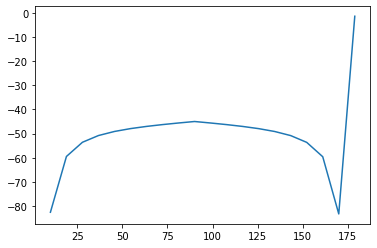

In [20]:
print(len(alphaOpt))

def tan(x,a,b):
    return a*np.tan(x-b)

popt,pcov = curve_fit(tan, appWindAngle, np.array(alphaOpt))

# plt.plot(180/np.pi*appWindAngle,180/np.pi*tan(appWindAngle,popt[0],popt[1]))
plt.plot(180/np.pi*appWindAngle[:len(alphaOpt)],180/np.pi*(np.array(alphaOpt)))

In [ ]:
S_0 = 1368 # W/m^2
epsilon = 0.77
alpha = 0.302
sigma = 5.671*10**(-8)

T_O = (S_0/4*(1-alpha)/sigma/(1-epsilon/2))**(1/4)
print(T_O)

287.6316624441055


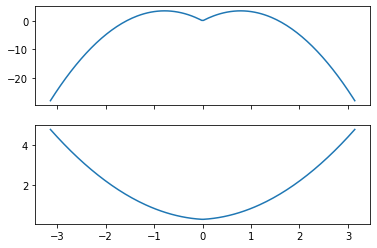

In [ ]:
a = np.linspace(-np.pi,np.pi,180)
c_L,c_D = coeff(a)
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(a,c_L)
ax[1].plot(a,c_D)

(0.0, 3.5998907649573986)

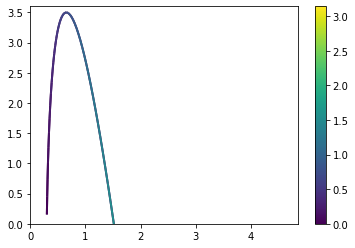

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

fig,ax = plt.subplots(1,1)
points = np.array([c_D, c_L]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(0, a.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(a)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)
ax.set_xlim(0, c_D.max()+0.1)
ax.set_ylim(0, c_L.max()+0.1)

In [26]:
print(180/np.pi*optimzeAngleOfAttack(170*np.pi/180)[0])

IndexError: list index out of range